# Loans: The Financial Two-Way gift between Savers and Borrowers
## by Ahmad Alashmony

## Preliminary Wrangling

> Had you ever tried to take a loan from any resource, ex. a Family member, a Friend, your Boss, your mates or even the place you work. It's not easy for anyone to borrow or to lend but, for financial institutions it's totally different. Moving money forward in time (Saving) and getting money backward in time (Borrowing) is the core business here. But There's Some Questions to answer here like:
1. Who to lend?
2. How much risk would I face?
3. What's the suitable (Expected Return) to face those risks?
4. Can Diversification grow-up my return (on Actual Basis not just as expected)?
5. What's the Maximum (Expected Return) for each industry?

> More and more Questions like this can be answered using Financial data Analysis. In this database which contains about 114K records about loans I'll get more data about the Borrower, the Customers and maybe some Economic conditions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [5]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [6]:
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [7]:
df.EmploymentStatus.value_counts()


Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### What is the structure of your dataset?

> The original Dataset contains 113937 Entry with 81 Column of data, I'll use only some data and I might use sampling if needed.

### What is/are the main feature(s) of interest in your dataset?

> Who want to get the most suitable return on his investment, must study the return and the risk and make a portfolio diversified well. This rule contains all financial institutions incluing commercial banks, They have to diversify their loan portfolio. This database contains the majour data that affect such financial decisions like Credit Quality which describe risk,  Interest rates which describe the return, reason of loan, Loan Amount, Borrower State, Borrower Occupation those can help to make diversified portfolio based on borrowers data (Location, Occupation, the customer's Employment status duration, The pupose of loan) and so on. Here's the most important analysis can start. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This analysis will check those concepts:

#### 1. We will check some general indicators of economics and the customers:

* The interest rates applied on loans.
* The purpose of loan
* Loan original amount
* Borrowers occupation
* Borrowers States


#### 2. We'll then check the relation between those indicators and each other and we'll dig deeper into the main defaulting indicators:

**- General Indicators:**
* Interest rates applied on different Risk rating 
* How does the Loan Amount affect the interest rate?
* The distribution of Loan Amounts for each Purpose of loan.

**- Defaulting factors, What's the major indicators of loans that might default:**
* Defaulting with Purpose.
* Defaulting with Borrower State.
* Defaulting with Risk rate.
* Defaulting with Occupation.
* Defaulting with Employment Duration.


#### 3. Lastly, we'll check The importance of collaterals such as income prove or Mortgage to both Loan Amount and Interest Rate. and What could happen if we applied high interest rate on a Larger loans.

## 1. Univariate Exploration (General Indicators):

> In this section, we'll investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

####  In general, What's the interest rate(s) that seems to be the most common (Might be one used for retail customer):

In [8]:
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

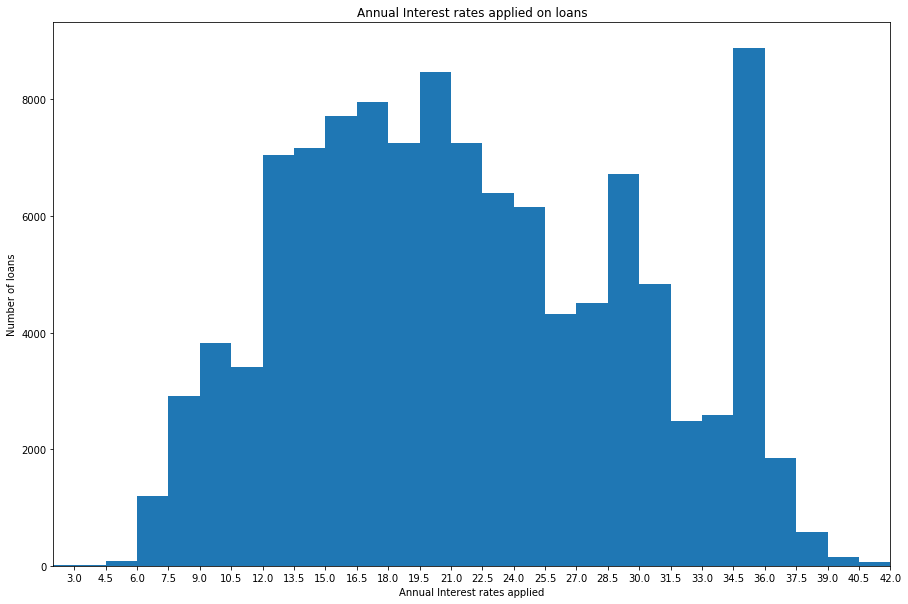

In [9]:
# A hist of interest rates applied on loans:
i_r = np.arange(0,df['BorrowerAPR'].max()+.015,0.015)
plt.figure(figsize=[15,10])
perc = np.arange(0,(df['BorrowerAPR'].max()*100)+1.5,1.5)
plt.hist(data=df, x='BorrowerAPR',bins=i_r);
plt.xticks(i_r,perc,rotation =0);
plt.title('Annual Interest rates applied on loans');
plt.xlabel('Annual Interest rates applied');
plt.ylabel('Number of loans');
plt.xlim(0.02,.42);

>Here it's, the most used rates between 12% and 22%, But I can still notice that between 34% and 36% is a huge amount (Looks like the double value of the most used) it might be a bad credit rating, the debtor about to default, the loan was in some range of time while there's economic deflation, or it might be a mistake while generating data, We can try find it out here:

In [10]:
# What's the credit rating for those have Rate more than 42% 
df.query('BorrowerAPR>0.42').CreditGrade.value_counts()

HR    6
Name: CreditGrade, dtype: int64

In [11]:
# and what happened to those loans

df.query('BorrowerAPR>0.42').LoanStatus.value_counts()

Defaulted     4
Chargedoff    2
Completed     1
Name: LoanStatus, dtype: int64

> As Expected, most of them was Very riskey and defaulted or even chargedoff.

#### Now, Let us see What's the most reason for taking a loan, it's an indicator for the demand on our products:

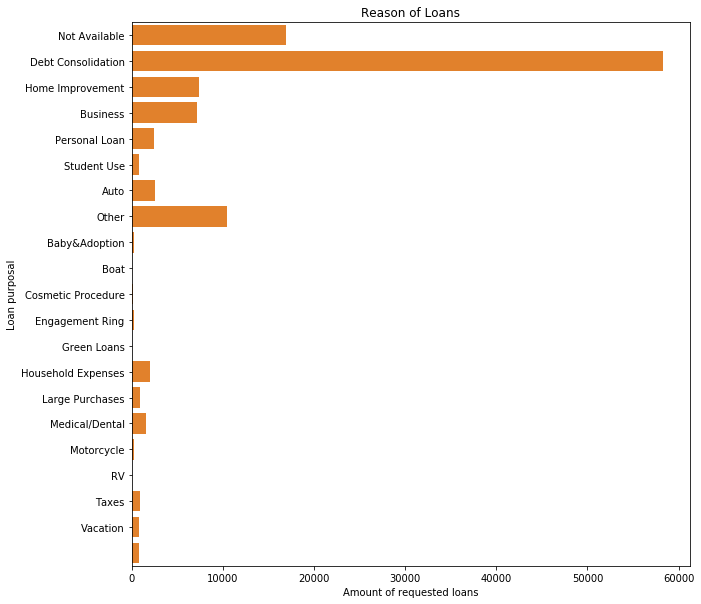

In [13]:
# A countplot of Loan purposes:

plt.figure(figsize=[10,10])
base_c = sb.color_palette()[1]
List_num = np.arange(0,20,1) 
List_name = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
sb.countplot(data=df, y='ListingCategory (numeric)',color=base_c);
plt.title('Reason of Loans');
plt.yticks(List_num,List_name,rotation = 0)
plt.xlabel('Amount of requested loans');
plt.ylabel('Loan purposal');


> Looks strange, Most of them are not loans for new customers, it's just refinancing the old ones. We have to recheck credit policy, Credit officers targets and our database. Another indicators here in the second and third highest rating, those are N/A and Other. I'll rearrange them to have a better view.  

In [14]:
# I'll add a new column (ListingCat) in a new df (df_cat) with categories in names to be easy to sort and read
List_num = np.arange(0,21,1)
List_name = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']

In [15]:
# a small df with names and numbers, I'll use it to join:
lcdf=pd.DataFrame(data = {'List_num': List_num, 'ListingCat': List_name})
lcdf


List_num          ListingCat
0          0       Not Available
1          1  Debt Consolidation
2          2    Home Improvement
3          3            Business
4          4       Personal Loan
5          5         Student Use
6          6                Auto
7          7               Other
8          8       Baby&Adoption
9          9                Boat
10        10  Cosmetic Procedure
11        11     Engagement Ring
12        12         Green Loans
13        13  Household Expenses
14        14     Large Purchases
15        15      Medical/Dental
16        16          Motorcycle
17        17                  RV
18        18               Taxes
19        19            Vacation
20        20       Wedding Loans

In [16]:
# a new df with names and numbers, I'll call the category name  column "ListingCat":

df_cat = df.join(lcdf, on='ListingCategory (numeric)')
df_cat['ListingCat'].value_counts() , df['ListingCategory (numeric)'].value_counts()

(Debt Consolidation    58308
 Not Available         16965
 Other                 10494
 Home Improvement       7433
 Business               7189
 Auto                   2572
 Personal Loan          2395
 Household Expenses     1996
 Medical/Dental         1522
 Taxes                   885
 Large Purchases         876
 Wedding Loans           771
 Vacation                768
 Student Use             756
 Motorcycle              304
 Engagement Ring         217
 Baby&Adoption           199
 Cosmetic Procedure       91
 Boat                     85
 Green Loans              59
 RV                       52
 Name: ListingCat, dtype: int64, 1     58308
 0     16965
 7     10494
 2      7433
 3      7189
 6      2572
 4      2395
 13     1996
 15     1522
 18      885
 14      876
 20      771
 19      768
 5       756
 16      304
 11      217
 8       199
 10       91
 9        85
 12       59
 17       52
 Name: ListingCategory (numeric), dtype: int64)

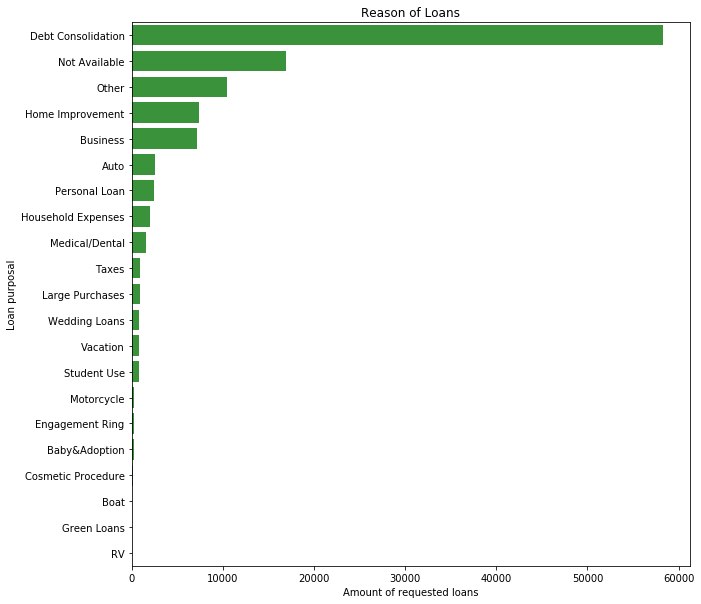

In [17]:
# A sorted countplot of Loan purposes:

plt.figure(figsize=[10,10])
base_c = sb.color_palette()[2]
List_num = np.arange(0,21,1) 
order = df_cat['ListingCat'].value_counts().index
sb.countplot(data=df_cat, y='ListingCat',color=base_c, order = order);
plt.title('Reason of Loans');
plt.xlabel('Amount of requested loans');
plt.ylabel('Loan purposal');

>Nothing more to see, It's the same unexpected surprise

#### What's our customers size, we will take the Loan Amount as a good indicator, We can see more later:

In [18]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

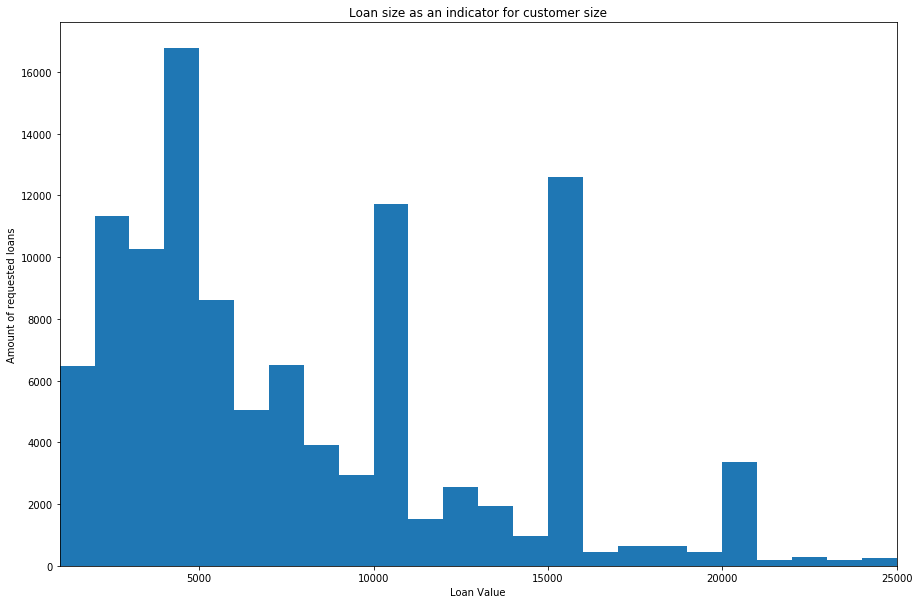

In [19]:
# A hist of Loans by their Amount, I'll exclude those more than 25K as they are very few:
plt.figure(figsize=[15,10])
step = 1000
bin_e = np.arange(1000,df.LoanOriginalAmount.max()+step , step )
plt.hist(data=df,x='LoanOriginalAmount',bins = bin_e);
plt.xlim(1000,25000);
plt.title('Loan size as an indicator for customer size');
plt.xlabel('Loan Value');
plt.ylabel('Amount of requested loans');

> Most of customers are retail or SMEs, A funny fact appears here: Most poeple like loans in 5x form (5,10,15,20,25, and it's on the 30 and 35 is outside our limit also).

#### What does our customers do so?

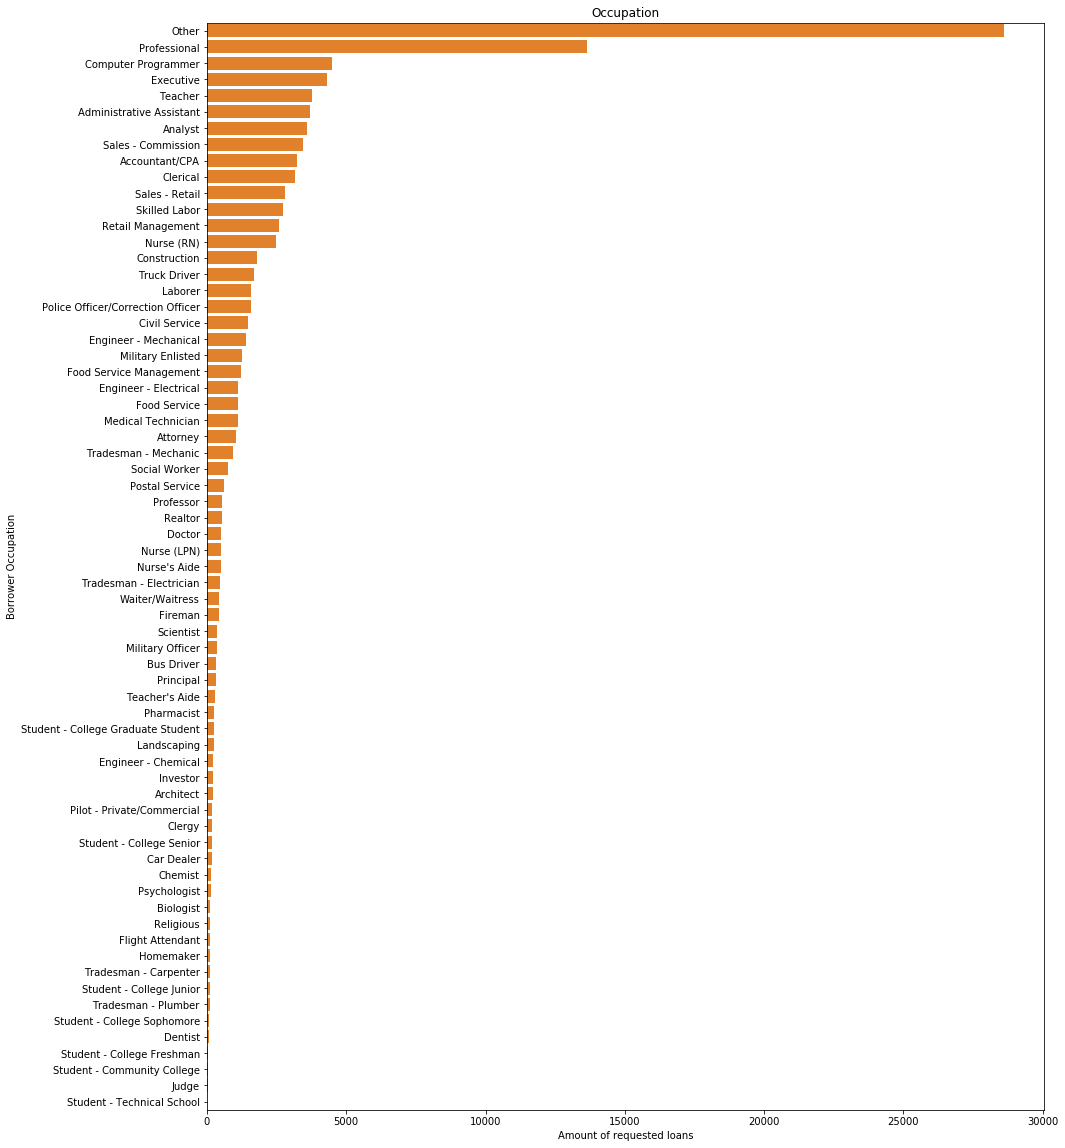

In [20]:
# A count plot of customers by Occupation:

plt.figure(figsize=[15,20])
base_c = sb.color_palette()[1]
order = df_cat['Occupation'].value_counts().index
sb.countplot(data=df_cat, y='Occupation',color=base_c, order = order);
plt.title('Occupation');
plt.xlabel('Amount of requested loans');
plt.ylabel('Borrower Occupation');

In [21]:
np.count_nonzero(df.Occupation.unique())

68

> Most of them are unidentified (Others and Professionals), That might refer to a bad data quality or a very diversified customers.

#### Where they live?

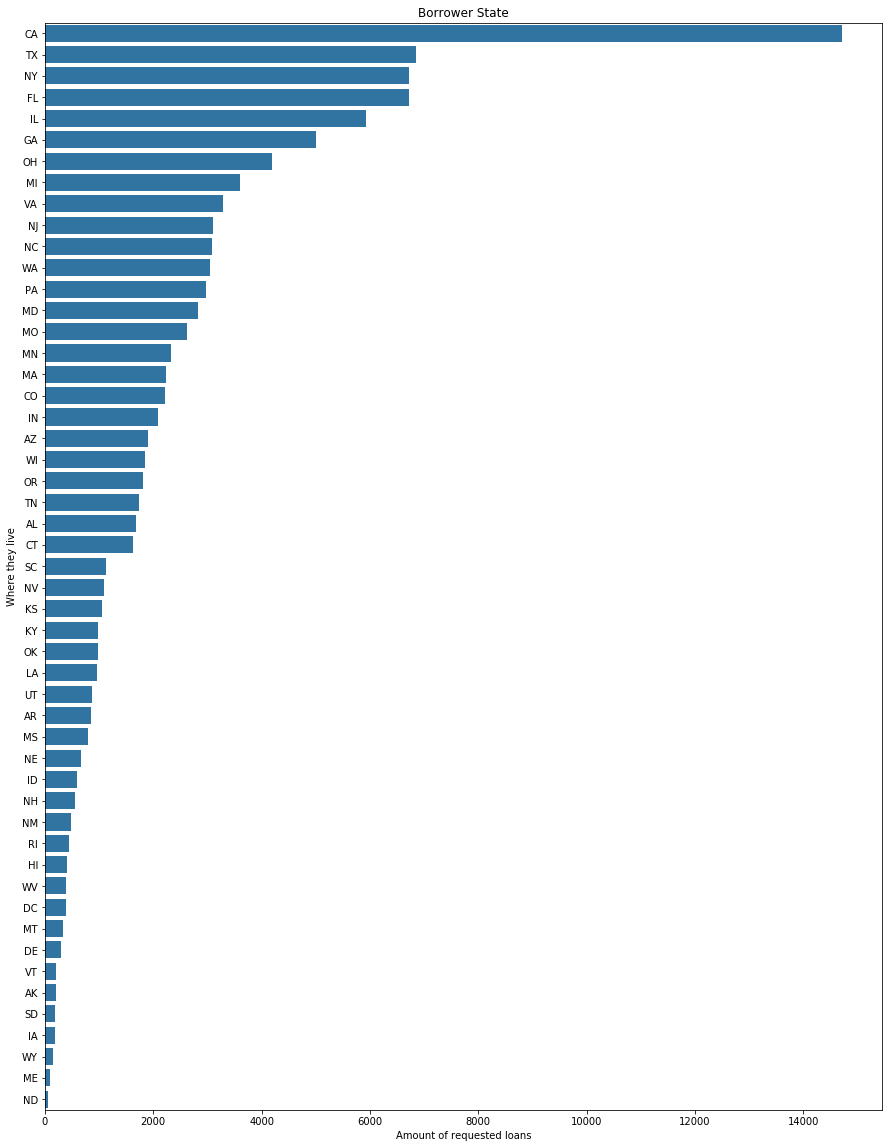

In [22]:
# I'll make a count plot for States of customers

plt.figure(figsize=[15,20])
base_c = sb.color_palette()[0]
order = df_cat['BorrowerState'].value_counts().index
sb.countplot(data=df_cat, y='BorrowerState',color=base_c, order = order);
plt.title('Borrower State');
plt.xlabel('Amount of requested loans');
plt.ylabel('Where they live');

> Here we see states with better economy on top of the list.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The interest rates had some outliars and needs to dig deeper, and the purpose of loan is out of logic, it maybe the database for Bad Debt Department. We'll go throw those points.
> We'll also dig deeper to see What's the Credit Rating for customers requesting a Consolidation Debt, What's it's amount and we will see whether if they defaulted or not?
> Reason of Defaulting might be an intersting topic also to dig deeper into as we talked about it.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I needed to change the Purpose of loan with it's category instead of Numeric value just to make it clear.
> I got a new realation between reuesting a Debt Consolidation and The financial cirses of 2008! Great!

## Bivariate Exploration (relation between indicators and the main defaulting indicators):

> In this section, we'll investigate relationships between pairs of variables in this
data. Some of them are already introduced in the previous section.

#### What's the affect of credit Quality on Interest rate, We have 2 Credit rating methods (Before and after 2009):**

In [23]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

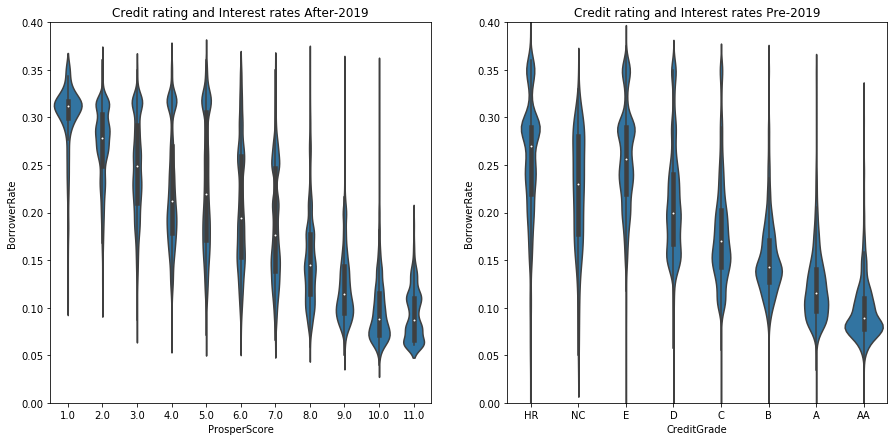

In [24]:
#I'll make two violin plots containing Interest Rates applied on each Risk rating level
# Plots will be diversified based on the rating method used

plt.figure(figsize = [15, 7])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.violinplot(data = df, x = 'CreditGrade', y = 'BorrowerRate', color = base_color, order =sort_cre_rat)
plt.title('Credit rating and Interest rates Pre-2019');
plt.ylim(0,0.4);


plt.subplot(1, 2, 1)
sb.violinplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', color = base_color)
g=plt.title('Credit rating and Interest rates After-2019');
plt.ylim(0,0.4);


>It's very clear how credit Quality affect Interest rates before and after 2009 (and the Financial Crises in 2008 also).

#### What's the affect of Loan Amount on Interest rate:

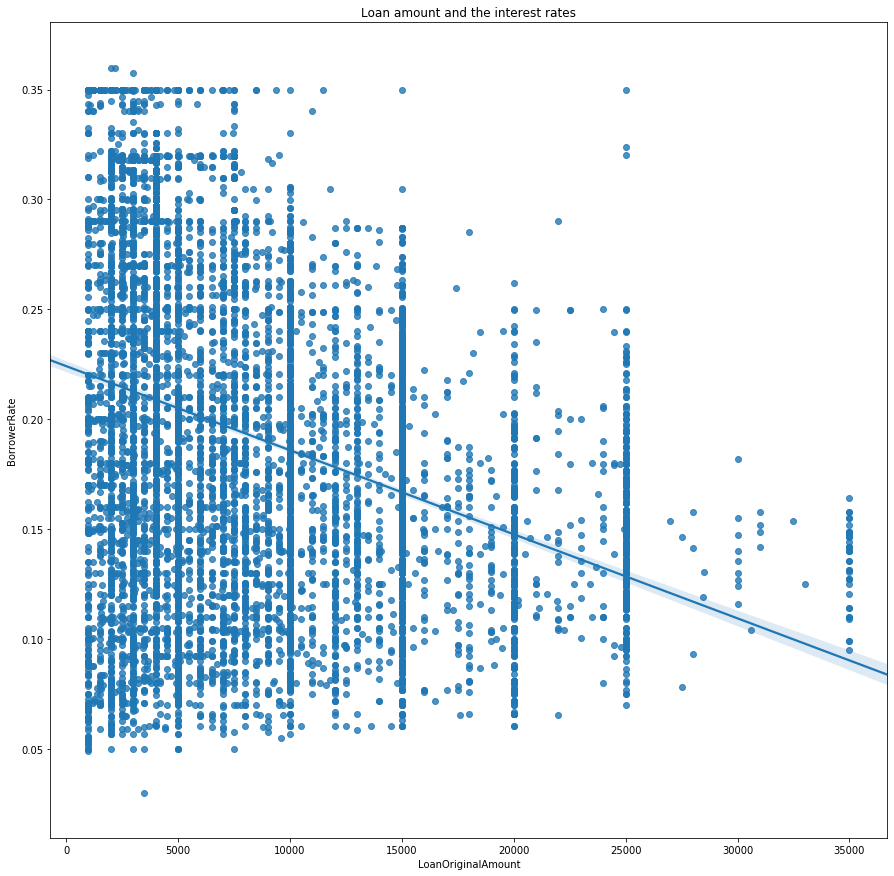

In [25]:
# I'll make a regplot of Loan amount and Interest rate, I'll use it instead of scatter to see If the Internal line has a direction
plt.figure(figsize = [15,15])
df_sample = df.sample(10000)
sb.regplot(data = df_sample, x = 'LoanOriginalAmount', y = 'BorrowerRate', color = base_color, x_jitter=0.1)
plt.title('Loan amount and the interest rates');

> It doesn't have the same effect but, It's still efficting it a little bit. The Larger the customer is the better interest rate he gets. For Example We can't see interest rate above 18% for customers who get a loan more than 25K.

 #### What's the Credit Rating for customers requesting a Consolidation Debt:

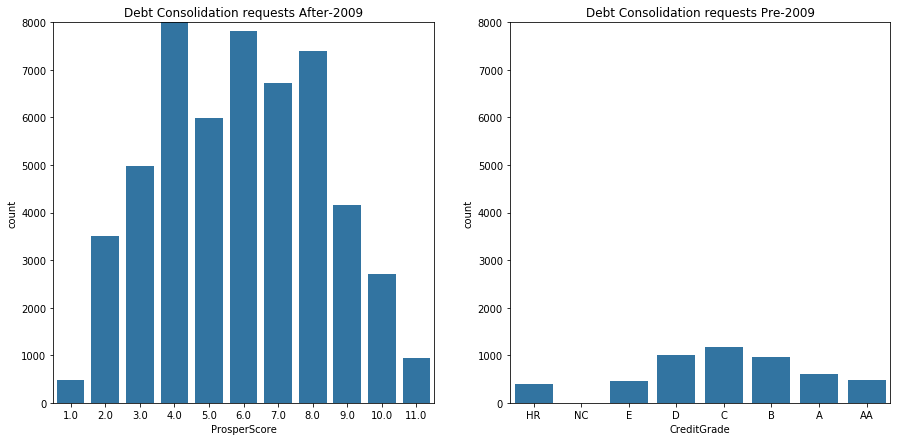

In [26]:
#I'll make Bar plots containing Number of Debt consolidation requests on each Risk rating level
# Plots will be diversified based on the rating method used:

plt.figure(figsize = [15, 7])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.countplot(data = df_cat.query('ListingCat == "Debt Consolidation"'), x = 'CreditGrade', color = base_color, order =sort_cre_rat)
plt.title('Debt Consolidation requests Pre-2009');
plt.ylim(0,8000);



plt.subplot(1, 2, 1)
sb.countplot(data = df_cat.query('ListingCat == "Debt Consolidation"'), x = 'ProsperScore', color = base_color)
g=plt.title('Debt Consolidation requests After-2009');
plt.ylim(0,8000);


>Here's a useful info, most of those requests accepted after changing the calculation method on different credit rating levels but, this change came after the World Financial Crises. What's the real reason for this growth?. It's Normal to find the customers with Very High Credit Rating less in Debt Consolidation requests (according to their high solvency) and the customers with very low credit Rating less also as they might default before they can request, we can check it in Multivariate Exploration stage.
 

#### What's the Distribution of Value in Dollars for each Loan Purposes?

<Figure size 1080x1080 with 0 Axes>

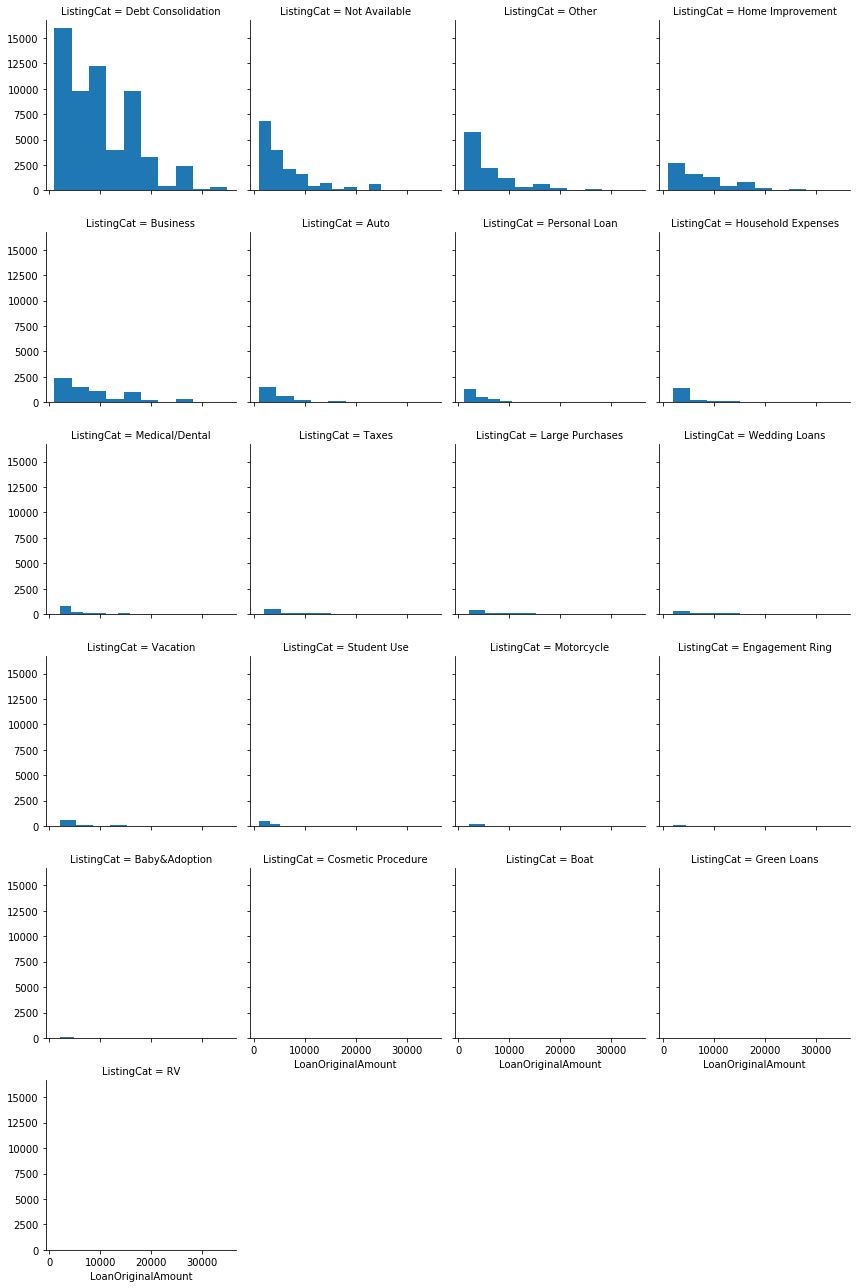

In [27]:
# A FacetGrid for each Loan purpose 
# each plot will hist the loan amount count:

plt.figure(figsize=[15,15]);
sort_cat=df_cat.ListingCat.value_counts().index
g = sb.FacetGrid(data = df_cat, col = 'ListingCat',col_order=sort_cat,col_wrap =4);
g.map(plt.hist, "LoanOriginalAmount");
#plt.title('Amount of Each purpose');


> Most of them are low amounts, small customers but, If we can see retail customers and very huge amount of Debt consolidation loans, does this mean they'll default?

#### What's the Status of Loans on every Category?

In [28]:
df_cat.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

> It's not good enough, I'll make a small transformation for Past Due (1-120 days) to be one value for better view and leave those more than 120 days , I'll also drop those cancelled ones.

In [29]:
# The few next lines will make a small transformation for Past Due (1-120 days) to be one value for better view and leave those more than 120 days , I'll also drop those cancelled ones.
df_cat.LoanStatus.replace(['Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)'],'Past Due (1-120 days)',inplace=True)

In [30]:
df_cat.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-120 days)      2051
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [31]:
df_cat= df_cat.drop(df_cat.query('LoanStatus== "Cancelled"').index)


In [32]:
df_cat.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-120 days)      2051
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

>Now, it's clear, I'm really excited to see! 

<Figure size 1440x7200 with 0 Axes>

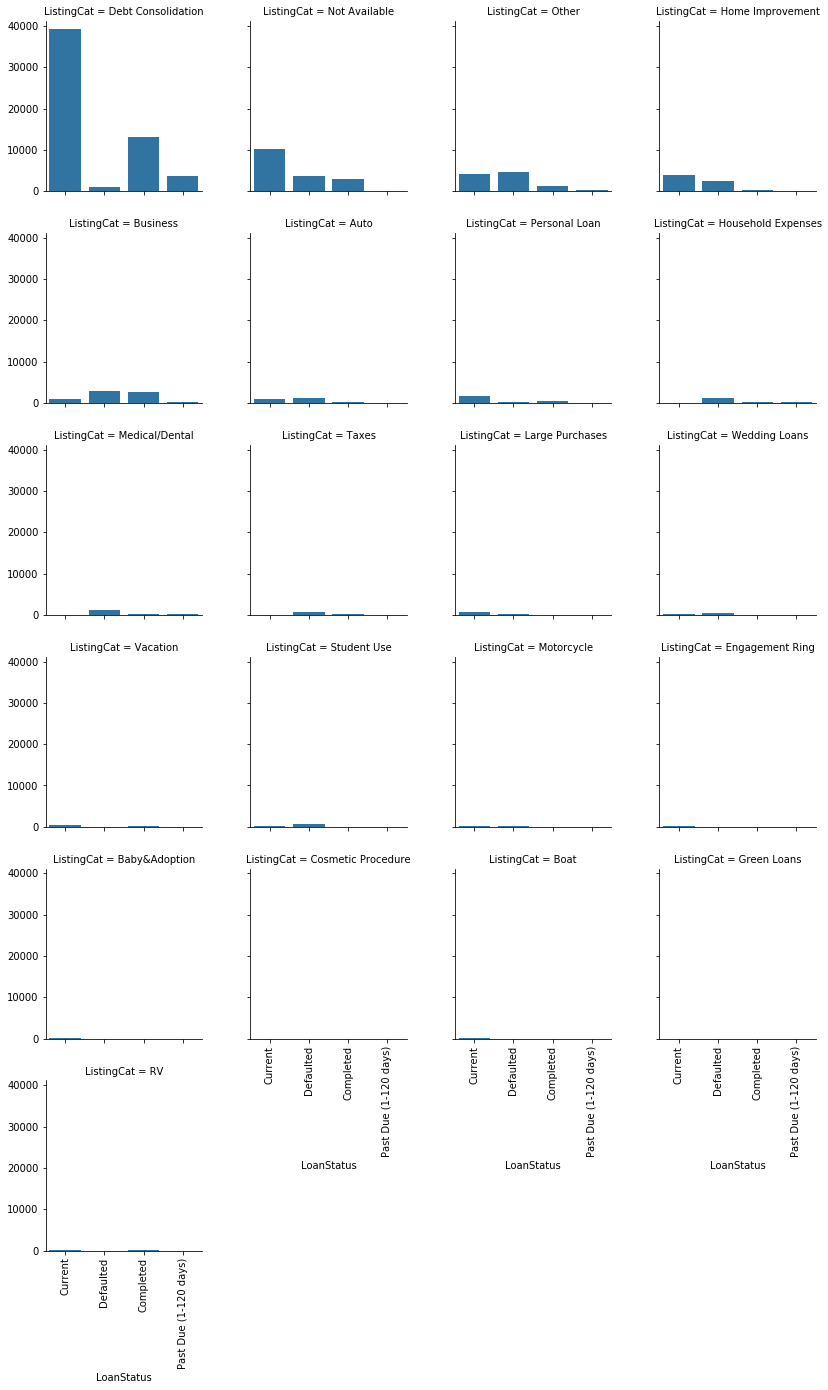

In [35]:
# a FacetGrid of the Loan purposes
# each plot will be the count of every Loan Status: 
plt.figure(figsize=[20,100]);
sort_cat=df_cat.ListingCat.value_counts().index
g = sb.FacetGrid(data = df_cat, col = 'ListingCat',col_order=sort_cat, col_wrap=4);
g.map(sb.countplot, "LoanStatus");
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];



> Ooooh, It seems like I was wrong, Most of them are performing well! I'll zoom in to recheck: 

#### What's the most defaulting categories?

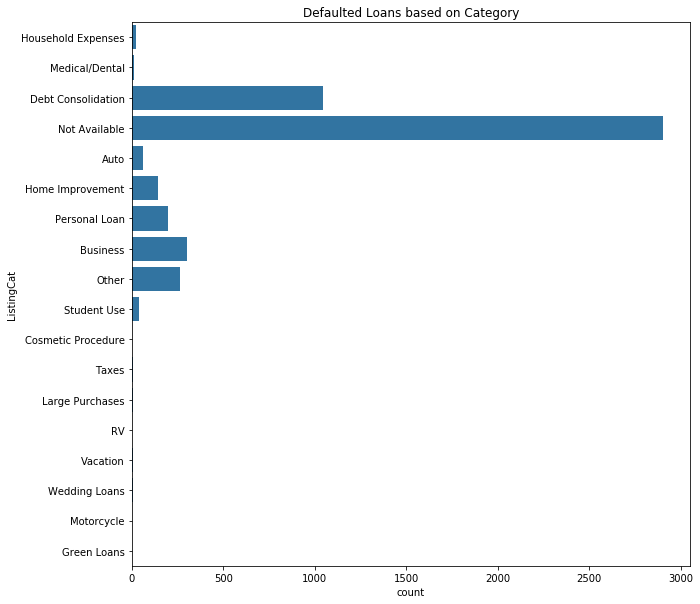

In [36]:
# I'll Plot the count of defaulted loans based on their Categories:

plt.figure(figsize = [10, 10])
main_defaulted=df_cat.query('LoanStatus == "Defaulted"')
ax = sb.countplot(data = main_defaulted, y = 'ListingCat', color=base_color);
#ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'cat_var2');

plt.title('Defaulted Loans based on Category');


>seems like the Debt Consolidation wasn't the most deafulting loans although it has the most count.

#### So, what's the Debt Consolidation loans status?

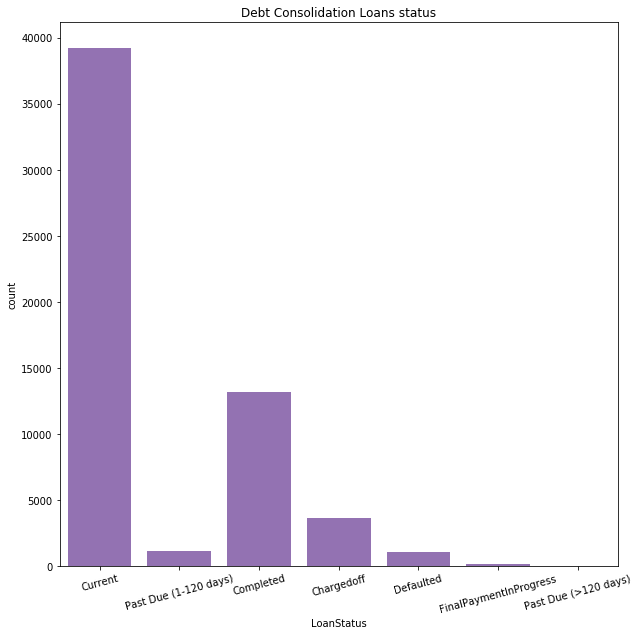

In [37]:
# I'll Plot the count of Debt Consolidation loans per their Status:

plt.figure(figsize = [10, 10])
baseColor = sb.color_palette()[4]
Cons = df_cat.query('ListingCat == "Debt Consolidation"')
ax = sb.countplot(data = Cons, x = 'LoanStatus', color=baseColor);
plt.title('Debt Consolidation Loans status');
plt.xticks(rotation=15);


> The most defaulted loans was N/A, The Debt Consolidation came in the second one but it's customers are still performing well, (as the propotion of their count is high related to otherm it's expected that their dafaulting count is higher).

#### As we're speaking on defaulting, what's the relation between defaulting and:

#### Borrower State:

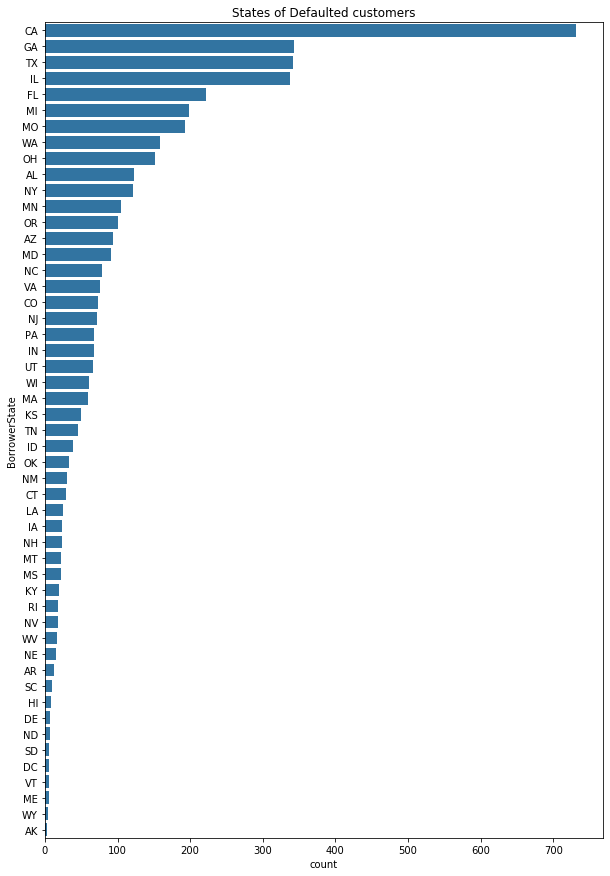

In [38]:
# I'll count the (defaulted) Cusomers by State:

plt.figure(figsize = [10, 15])
baseColor = sb.color_palette()[0]
sort= df.BorrowerState.value_counts().index
defaulted = df.query('LoanStatus == "Defaulted"')
sort= defaulted.BorrowerState.value_counts().index
ax = sb.countplot(data = defaulted, y = 'BorrowerState', color=baseColor, order = sort);
plt.title('States of Defaulted customers');


> The most states in loans, seems like to be the most to default.

#### What's the rating of defaulting customers, for pre and after Jun 2009 credit rating methods:

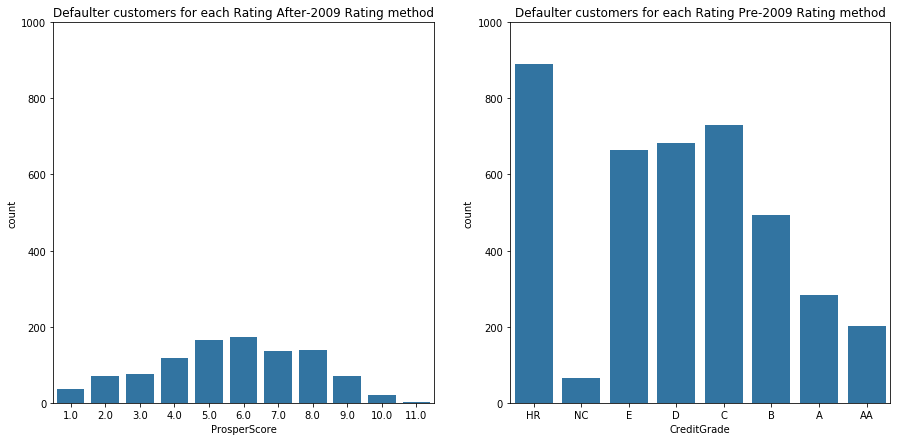

In [39]:
#I'll make Bar plots containing Number of defaulted loans applied on each Risk rating level
# Plots will be diversified based on the rating method used

plt.figure(figsize = [15, 7])
base_color = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')

plt.subplot(1, 2, 2)
sort_cre_rat = ['HR','NC','E','D','C','B','A','AA',] 
sb.countplot(data = defaulted, x = 'CreditGrade', color = base_color, order =sort_cre_rat)
plt.title('Defaulter customers for each Rating Pre-2009 Rating method');
plt.ylim(0,1000);



plt.subplot(1, 2, 1)
sb.countplot(data =defaulted, x = 'ProsperScore', color = base_color)
g=plt.title('Defaulter customers for each Rating After-2009 Rating method');
plt.ylim(0,1000);


> It's related on the Old Risk Rating method more than the new one, Or might be because we made a good Debt Reconsolidation agreements with them.

#### Who are the most defaulters?

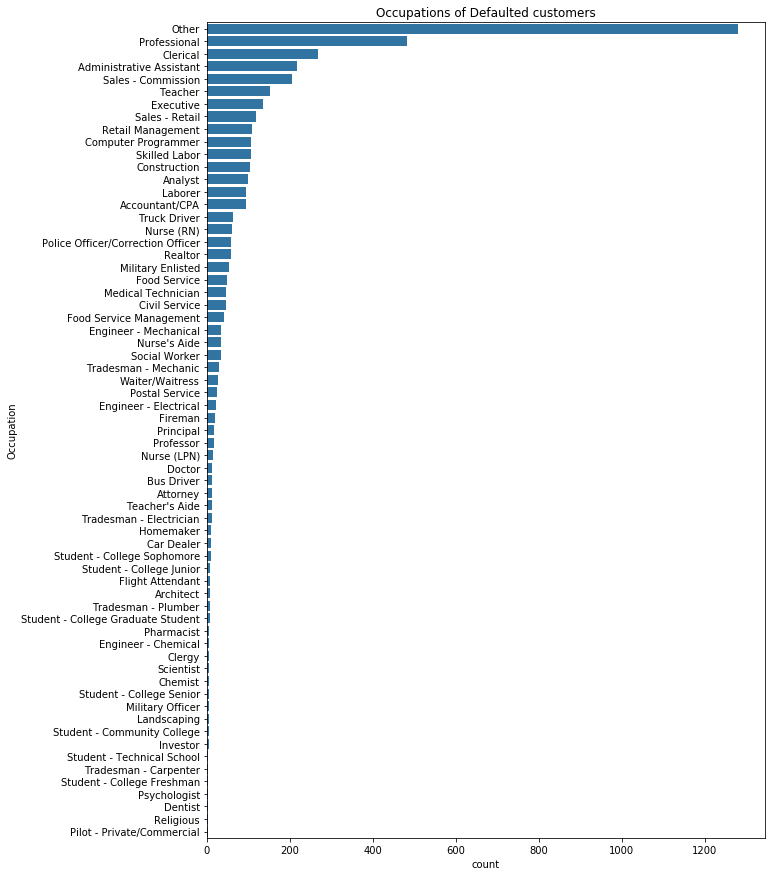

In [40]:
#I'll make count plot for eatch ocuupation who defaulted:

plt.figure(figsize = [10, 15])
baseColor = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')

sort= defaulted.Occupation.value_counts().index
ax = sb.countplot(data = defaulted, y = 'Occupation', color=baseColor, order = sort);
plt.title('Occupations of Defaulted customers');

> Others and professionals are still on the top, The top borrowers and the top defaulters.
#### Is it more related to the duration they had in their jobs?

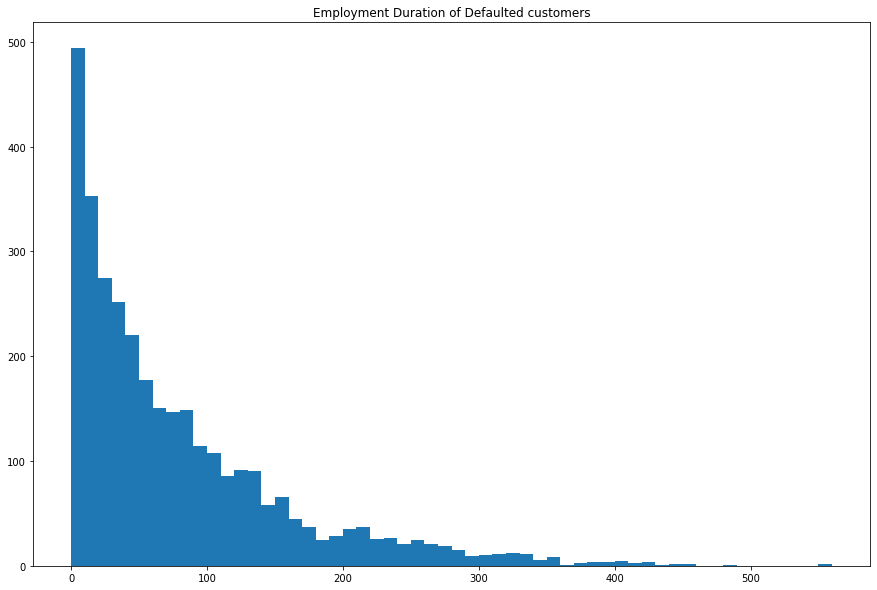

In [41]:
# I'll make a hist for each defaulted Employment Status Duration (per 10 months):

plt.figure(figsize = [15,10])
baseColor = sb.color_palette()[0]
defaulted = df.query('LoanStatus == "Defaulted"')
step= 10
bins = np.arange(0,defaulted.EmploymentStatusDuration.max()+step,step)

sort= defaulted.EmploymentStatusDuration.value_counts().index
plt.hist(data = defaulted, x = 'EmploymentStatusDuration', color=baseColor, bins =bins );
plt.title('Employment Duration of Defaulted customers');

> It's better to look here, Older Employees has better salaries and also has a stable job and their possibility to default is lower.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It's clear now what makes interest rate so high as (Double) of other Loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Debt Consolidation might be a bad indicator but, the Unknown data are more risky. I need to check both of them 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Now, It's the time to find out what's the importance of providing income verification to the Loan Amount and the Interest rate!


D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


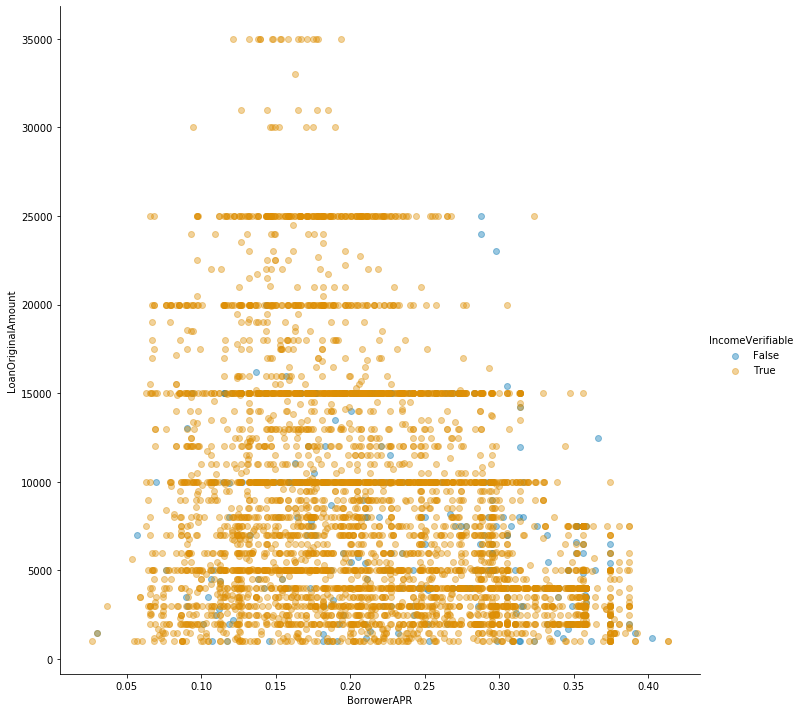

In [42]:
# I'll make FacetGrid to based on Which the Income was verified or not 
# The plot will show the interest rates and Loan Amounts for each
sample=df.sample(5000)
g = sb.FacetGrid(data = sample, hue = 'IncomeVerifiable', size = 10,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.4);
g.add_legend();


> It's still not clear as on very small loans the interest rates is related to many other factors, Let's see it on higher values:

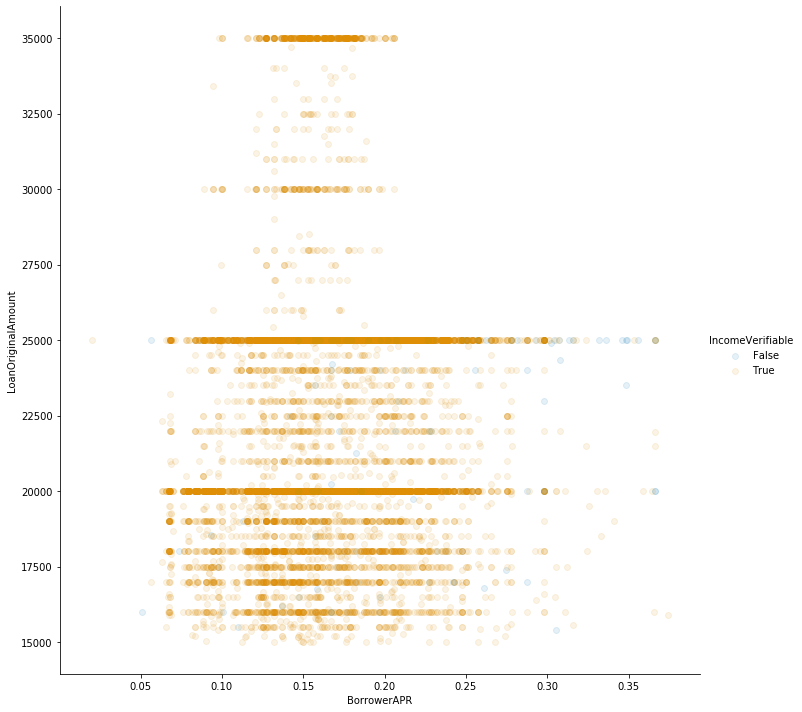

In [43]:
# I'll make FacetGrid to based on Which the Income was verified or not 
# The plot will show the interest rates and Loan Amounts more than 15K 

sample=df.query('LoanOriginalAmount>15000')
g = sb.FacetGrid(data = sample, hue = 'IncomeVerifiable', size = 10,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();


> It's much better, Income verification is very required for loans above 25K, and it's very expected to get a lower Interest rate if I have income approval 

#### And what's the importance of providing a collateral like mortgage to the Loan Amount and the Interest rate!

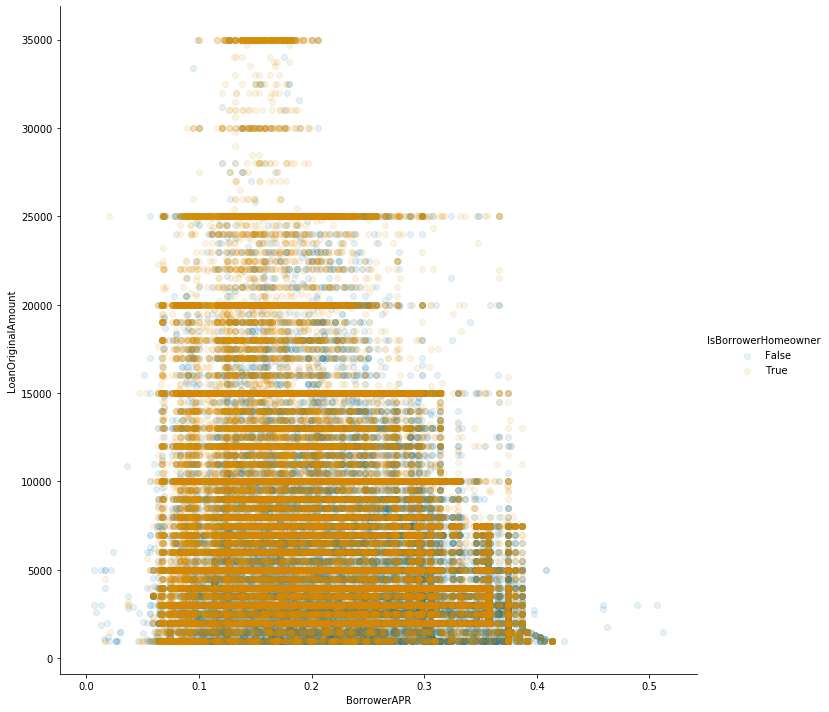

In [44]:
# I'll make FacetGrid to based on Which a borrower added a mortgage as a collateral or not 
# The plot will show the interest rates and Loan Amounts  

g = sb.FacetGrid(data = df, hue = 'IsBorrowerHomeowner', size = 10,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();

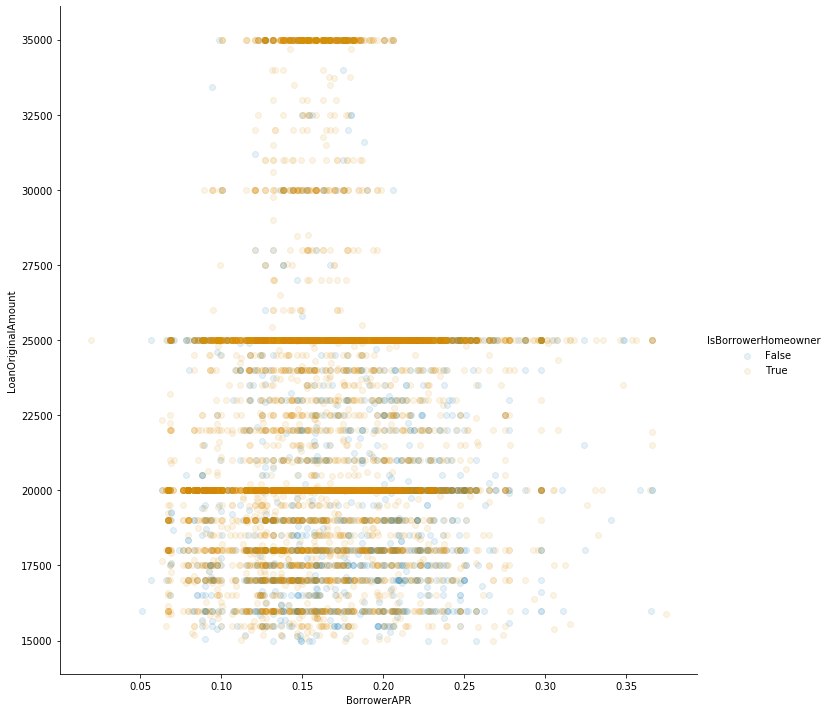

In [45]:
# I'll make FacetGrid to based on Which a borrower added a mortgage as a collateral or not 
# The plot will show the interest rates and Loan Amounts more than 15K 

sample=df.query('LoanOriginalAmount> 15000')
g = sb.FacetGrid(data = sample, hue = 'IsBorrowerHomeowner', size = 10,
                 palette = 'colorblind');
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount',alpha =.1);
g.add_legend();

> So, With high Amount of loans, we need collateral

#### Is there any relation between defaulting and the high interest rates on every loan amount?

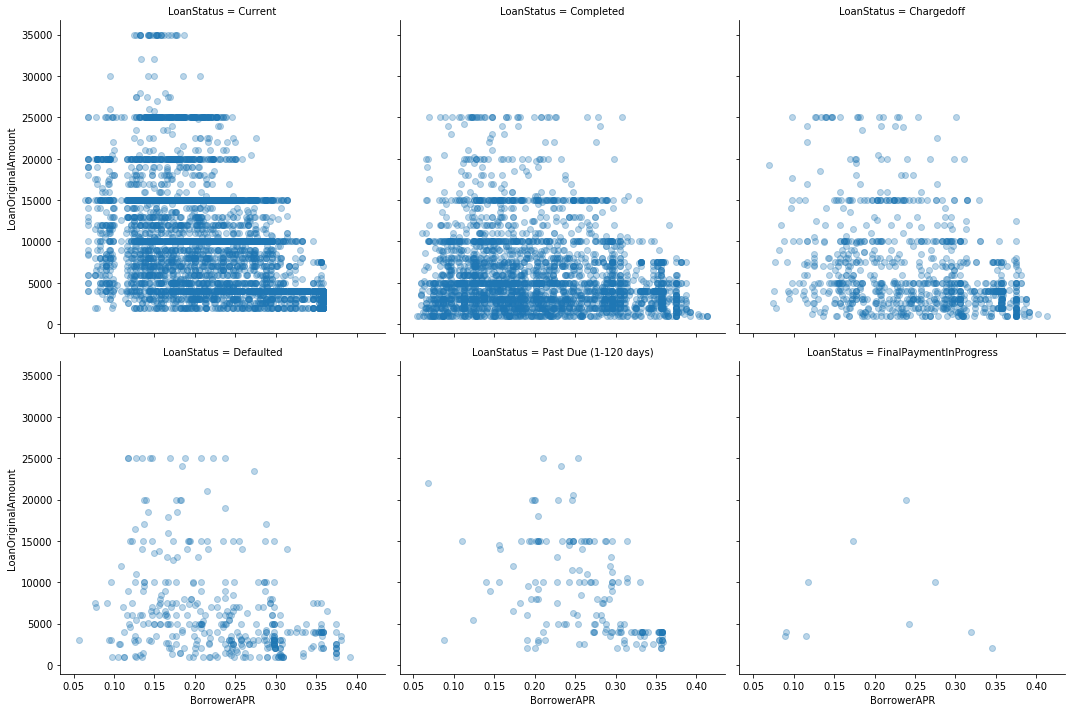

In [46]:
# I'll make FacetGrid to based on Loan Status, every plot will Considers the rate applied on Loan Amount

sample =df_cat.sample(9000) 
g = sb.FacetGrid(data = sample, col = 'LoanStatus', size = 5,  col_wrap=3,
                 palette = 'colorblind')
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha = .3)

g.add_legend()


> Although There's a very few loans defaulted for amounts higher than 25K and interest rates lower than 10% and although  They had not also charged off, It seems like there's no relation as the Loans above 25K are actually too few in the database and most interest rates over 10%.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For Loans with high values, It's required to have more collaterals, The Income or a Mortgage. And defaulting is not related to customer proprieties such as risk rating and Employment duration not to Loan proproties such as Amount, reason or even interest rates applied to it.

### Were there any interesting or surprising interactions between features?

> I thought that I might get a sign between defaulting and interest rate on high amount0 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!